In [1]:
import matplotlib.pyplot as plt
import matplotlib.pyplot as plot
from astropy.visualization import astropy_mpl_style
plt.style.use(astropy_mpl_style)
from astropy.io import fits
from matplotlib import pyplot as plt
%load_ext autoreload
%autoreload 2
%matplotlib inline

name:
    ['wave', 'flux', 'error', 'contam', 'trace', 'etrace', 'sensitivity']
format:
    ['D', 'D', 'D', 'D', 'D', 'D', 'D']
unit:
    ['ANGSTROMS', 'ELECTRONS/S', 'ELECTRONS/S', 'ELECTRONS/S', 'ELECTRONS/S', 'ELECTRONS/S', 'E/S / 1E-17 CGS']
null:
    ['', '', '', '', '', '', '']
bscale:
    ['', '', '', '', '', '', '']
bzero:
    ['', '', '', '', '', '', '']
disp:
    ['', '', '', '', '', '', '']
start:
    ['', '', '', '', '', '', '']
dim:
    ['', '', '', '', '', '', '']
coord_type:
    ['', '', '', '', '', '', '']
coord_unit:
    ['', '', '', '', '', '', '']
coord_ref_point:
    ['', '', '', '', '', '', '']
coord_ref_value:
    ['', '', '', '', '', '', '']
coord_inc:
    ['', '', '', '', '', '', '']
time_ref_pos:
    ['', '', '', '', '', '', '']


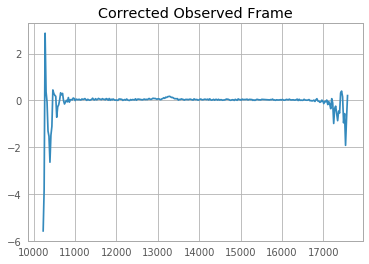

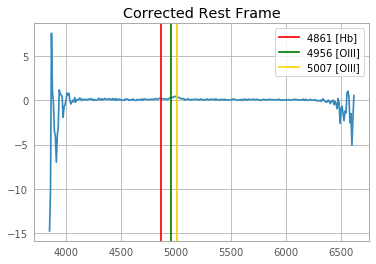

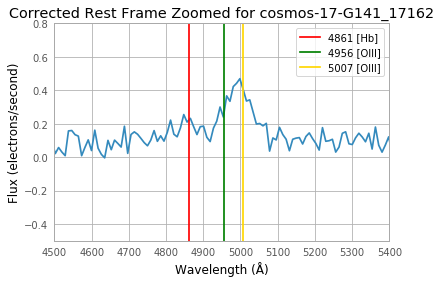

In [8]:
#Just defining various things
data_1D=fits.open(r'C:/Users/Donny/Desktop/,/try/cosmos-17-G141_17162.1D.fits')
#data_1D.info()
hdr = data_1D[1].header
#print(repr(hdr))
#print(list(hdr.keys()))
data = data_1D[1].data
#print(data)
data.shape
cols = data_1D[1].columns
cols.info()    #- This is very helpful-defines matrix elements!
#data_1D[1].columns  
#list(data['wave']) 



#1D observed frame data plot code! (Variable assigments)
wave=data["wave"]
#print(wave)
flux=data['flux']
#print (flux)
contam=data['contam']
#print(contam)
sens=data['sensitivity']
#print(len(wave))



#setting up plot data
corflux,corwave=[],[]
for a in range(len(sens)):
    if sens[a]==0:
        print(a)
    corflux1=((flux[a]-contam[a])/sens[a])
    corflux.append(corflux1)
#print(corflux)
for a in range(len(wave)):
    wave1=(wave[a])
    corwave.append(wave1)
#print(corflux)
plot.plot(corwave,corflux)
plot.title('Corrected Observed Frame')
plot.show()
from astropy.table import Table
master=Table.read(r'C:/Users/Donny/Desktop/,/GOODS/3dhst.v4.1.5.master.fits')
masterfile=master.to_pandas()
redshift=masterfile['z_best']
redshift=redshift.values
grismid=masterfile['grism_id'].str.decode('utf-8')
grismid=grismid.values
#print(grismid)
#print(len(redshift))
for o in range(len(grismid)):
    if grismid[o]=='cosmos-17-G141_17162':
       # print(redshift[o])
        z=redshift[o]
       
        
#Rest frame data settup! 
addedz=(1+z)
restflux=[addedz*x for x in corflux]
#rest frame corected wave
restwave=[(1/addedz)*x for x in corwave]
plot.plot (restwave,restflux)
plot.title('Corrected Rest Frame')
plot.axvline(x=4861, color='r', label='4861 [Hb]')
plot.axvline(x=4956, color='g', label='4956 [OIII]')
plot.axvline(x=5007, color='gold', label="5007 [OIII]")
plot.legend()
plot.show()
#zoomed
plot.plot (restwave,restflux)
plt.axis([4500,5400,-.5,.8])
plot.title('Corrected Rest Frame Zoomed for cosmos-17-G141_17162')
plot.axvline(x=4861, color='r', label='4861 [Hb]')
plot.axvline(x=4956, color='g', label='4956 [OIII]')
plot.axvline(x=5007, color='gold', label="5007 [OIII]")
plot.legend()
plot.xlabel("Wavelength (Å)")
plot.ylabel("Flux (electrons/second)")
plot.show()

Filename: C:/Users/Donny/Desktop/,/try/cosmos-04-G141_11682.2D.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      36   ()      
  1  DSCI          1 ImageHDU         8   (26, 26)   float64   
  2  DINTER        1 ImageHDU         8   (26, 26)   float64   
  3  DWHT          1 ImageHDU         8   (26, 26)   float32   
  4  DSEG          1 ImageHDU         8   (26, 26)   int32   
  5  SCI           1 ImageHDU        21   (312, 26)   float64   
  6  WHT           1 ImageHDU        22   (312, 26)   float64   
  7  MODEL         1 ImageHDU        22   (312, 26)   float64   
  8  CONTAM        1 ImageHDU        22   (312, 26)   float64   
  9  WAVE          1 ImageHDU        21   (312,)   float64   
 10  SENS          1 ImageHDU        22   (312,)   float64   
 11  YTRACE        1 ImageHDU        22   (312,)   float64   
None


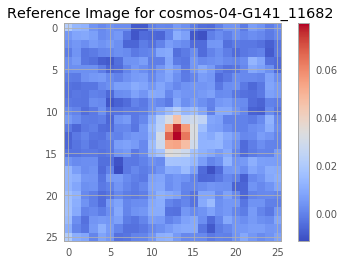

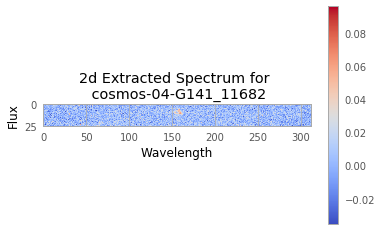

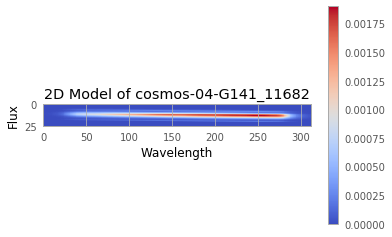

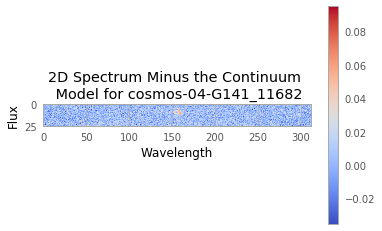

In [6]:
#making 2d data tables
data2D=fits.open(r'C:/Users/Donny/Desktop/,/try/cosmos-04-G141_11682.2D.fits')
print(data2D.info())

#model image
model=data2D[1].data
plot.show()
plt.figure()
plt.imshow(model, cmap='coolwarm')
plt.colorbar()
plot.title("Reference Image for cosmos-04-G141_11682 ")

#the 2d extracted spectrum
model=data2D[5].data
plot.show()
plt.figure()
plt.imshow(model, cmap='coolwarm')
plt.colorbar()
plot.xlabel("Wavelength")
plot.ylabel("Flux")
plot.title("2d Extracted Spectrum for \n cosmos-04-G141_11682")


#the 2d model
model=data2D[7].data
plot.show()
plt.figure()
plt.imshow(model, cmap='coolwarm')
plt.colorbar()
plot.xlabel("Wavelength")
plot.ylabel("Flux")
plot.title("2D Model of cosmos-04-G141_11682")

#the 2D spectrum minus the continuum model
model=(data2D[5].data-data2D[7].data)
plt.figure()
plt.imshow(model, cmap='coolwarm')
plt.colorbar()
plot.xlabel("Wavelength")
plot.ylabel("Flux")
plot.title("2D Spectrum Minus the Continuum \n Model for cosmos-04-G141_11682")
plot.show()

In [ ]:
What to work on in future to be done with part 1!

#find way to loop this process for all 1d and 2d files

#how do I label the Hb (4861) and [OIII] (4959 and 5007) lines at the appropriate redshift??? 
#(Do i even have the right graph for this? and have I accounted for redshift?) how do you read 2d spectra?


